# Lead Scoring Case Study



- The X education company wants to predicts the 'hot leads' (the customer who has higher chances of getting the course).
- We have 37 predictor variables which needs to predict weather the customer will buy the course or not.

In [1]:
# Importing the required library

import numpy as np,pandas as pd

In [2]:
# Importing the required file

df=pd.read_csv('Leads.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the size of data

df.shape

(9240, 37)

- We have 37 features and 9240 rows to work on.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Checking for null value percentage in each variable

df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Some variables have high null values so better to drop those variables as they are in significant to our model.

- Asymmetrique Activity Index                      
- Asymmetrique Profile Index                       
- Asymmetrique Activity Score                      
- Asymmetrique Profile Score
- Lead Quality
- Tags
- Lead Profile
- How did you hear about X Education
- City
- Prospect ID (not so important)
- Lead Number (not so important)

In [9]:
df_1=df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education','City','Prospect ID','Lead Number','Lead Quality','Tags','Lead Profile'],axis=1)

In [10]:
df_1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [11]:
df_1.shape

(9240, 26)

### Now there are some variables whose null values should be replaced by the maximum occurance of that value in that variable.

- What matters most to you in choosing a course-> Better Career Prospects.
- What is your current occupation-> Unemployed.
- Country-> India.


In [12]:
df_1['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [13]:
df_1['What is your current occupation'].fillna('Unemployed',inplace=True)

In [14]:
df_1['Country'].fillna('India',inplace=True)

In [15]:
# Replacing the null values of specialisation with 'Unknown'

df_1['Specialization']=df_1['Specialization'].replace('Select','Unknown')

### We can drop those values in variables which have very less percentage of null values such as:

- Lead Source
- TotalVisits.
- Page Views Per Visit.
- Last Activity. 

In [16]:
df_1.shape

(9240, 26)

In [17]:
df_2=df_1.dropna()

In [18]:
df_2.shape

(7643, 26)

In [19]:
df_2.isnull().sum()/len(df_2)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

- So we have removed and replaced all the required values needed for model building.

In [20]:
df_2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7643 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    7643 non-null   object 
 1   Lead Source                                    7643 non-null   object 
 2   Do Not Email                                   7643 non-null   object 
 3   Do Not Call                                    7643 non-null   object 
 4   Converted                                      7643 non-null   int64  
 5   TotalVisits                                    7643 non-null   float64
 6   Total Time Spent on Website                    7643 non-null   int64  
 7   Page Views Per Visit                           7643 non-null   float64
 8   Last Activity                                  7643 non-null   object 
 9   Country                                        7643 

In [22]:
# Now Replacing the binary values of variables to binary digits.

df_3=df_2.replace({'No':0,'Yes':1})

In [23]:
df_3['Specialization']=df_3['Specialization'].replace('Select','Unknown')

In [24]:
df_3.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified


In [25]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7643 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    7643 non-null   object 
 1   Lead Source                                    7643 non-null   object 
 2   Do Not Email                                   7643 non-null   int64  
 3   Do Not Call                                    7643 non-null   int64  
 4   Converted                                      7643 non-null   int64  
 5   TotalVisits                                    7643 non-null   float64
 6   Total Time Spent on Website                    7643 non-null   int64  
 7   Page Views Per Visit                           7643 non-null   float64
 8   Last Activity                                  7643 non-null   object 
 9   Country                                        7643 

In [26]:
# Getting the statistical view of data

df_3.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.0,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.0,7643.0,7643.0,7643.0,7643.000000
mean,0.080204,0.000262,0.429674,3.811723,533.502944,2.625275,0.001570,0.0,0.000262,0.000131,0.000131,0.000523,0.000916,0.0,0.0,0.0,0.0,0.377600
std,0.271627,0.016175,0.495062,5.088462,554.499217,2.152075,0.039596,0.0,0.016175,0.011438,0.011438,0.022872,0.030251,0.0,0.0,0.0,0.0,0.484819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,2.000000,61.000000,1.330000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,3.000000,295.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,1.000000,5.000000,1010.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


# Staring with Exploratory Data Analysis

In [27]:
# Importing the required library

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Univarient Analysis

([<matplotlib.axis.XTick at 0x2055951d7c0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

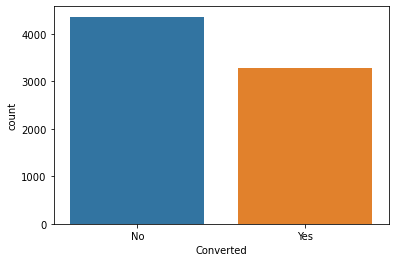

In [28]:
sns.countplot(df_3.Converted)
plt.xticks(ticks=[0,1],labels=['No','Yes'])

- We see that more than 4000 people has not applied while around 3000 people has applied for the course.

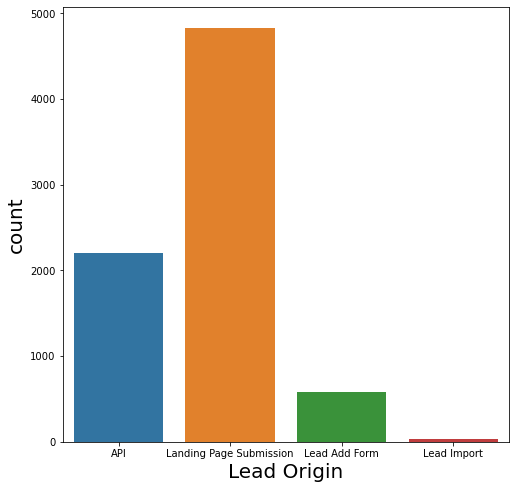

In [29]:
plt.figure(figsize=[8,8])
sns.countplot(df_3['Lead Origin'])
plt.xlabel('Lead Origin',size=20)
plt.ylabel('count',size=20)
plt.show()

- Most of the leads are generated through 'Landing page submission'.

In [30]:
df_3['Lead Source'].value_counts()

Google               2514
Direct Traffic       2468
Organic Search       1035
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  5
Click2call              4
bing                    3
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [31]:
# Here the value Google and google are similiar so merging these two names.

df_3['Lead Source']=df_3['Lead Source'].replace('google','Google')

In [32]:
# For feature 'Lead Source'

#  As we can see that the values many values such as blog,pay per click ads,bings have very less counts so we can convert these values name 'other' to one single value for ease of model building.

df_3['Lead Source']=df_3['Lead Source'].replace(['Facebook','Click2call','bing','Social Media','Live Chat','Press_Release','Pay per Click Ads','WeLearn','blog','welearnblog_Home','youtubechannel','testone','NC_EDM'],'other')

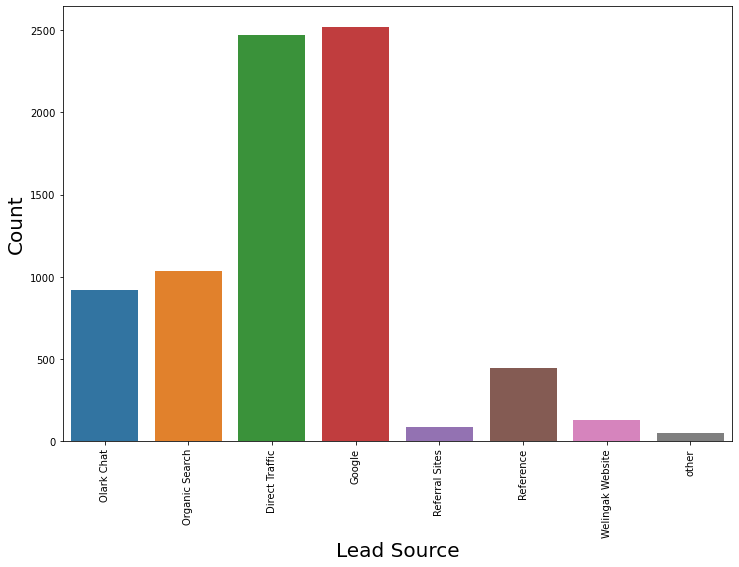

In [33]:
plt.figure(figsize=[12,8])
sns.countplot(df_3['Lead Source'])
plt.xticks(rotation=90)
plt.xlabel('Lead Source',size=20)
plt.ylabel('Count',size=20)
plt.show()

- Majority sources of leads are 'Direct traffic' and 'Organic search'.

In [34]:
# For featuere 'Specialization', we see that some specialization are have very less frequency values so we can merge those specialization into one specific specialization.

In [35]:
df_3['Specialization']=df_3['Specialization'].replace(['E-COMMERCE','Hospitality Management','Retail Management','Rural and Agribusiness','E-Business','Services Excellence'],'other specialization')

In [36]:
df_3['Specialization'].value_counts()

Unknown                              1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
other specialization                  492
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Name: Specialization, dtype: int64

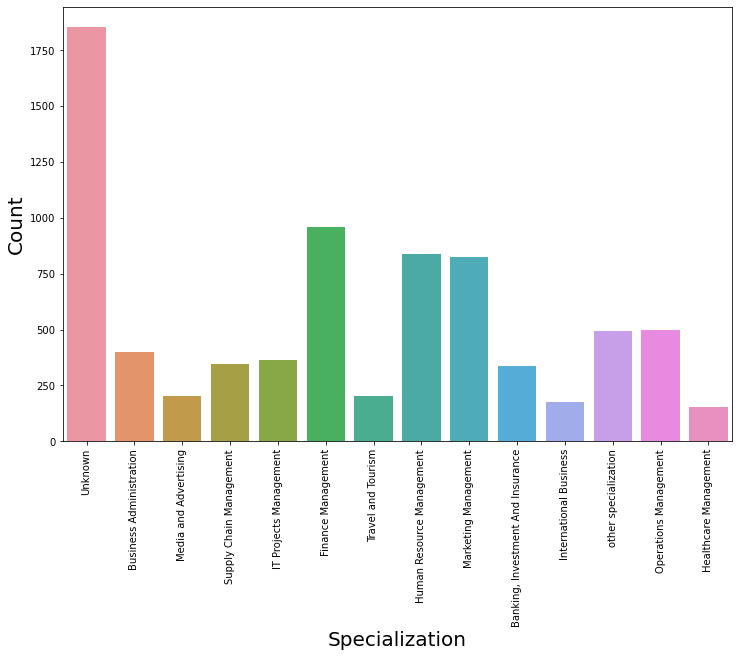

In [37]:
plt.figure(figsize=[12,8])
sns.countplot(df_3['Specialization'])
plt.xticks(rotation=90)
plt.xlabel('Specialization',size=20)
plt.ylabel('Count',size=20)
plt.show()


- Apart from all the courses 'Finance Management','Human Resourse Management' and 'Marketing Management' is more popular.

In [38]:
# For the feature 'Last Notable Activity'.

# As there are many activities which have very less counts, so we can merge these activities named 'other activity' to one activity for the simplicity of model building.

df_3['Last Notable Activity']=df_3['Last Notable Activity'].replace(['Page Visited on Website','Email Link Clicked','Olark Chat Conversation','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','View in browser link Clicked','Form Submitted on Website','Email Received'],'other activity')

In [39]:
df_3['Last Notable Activity'].value_counts()

Modified          2493
Email Opened      2481
SMS Sent          2037
other activity     632
Name: Last Notable Activity, dtype: int64

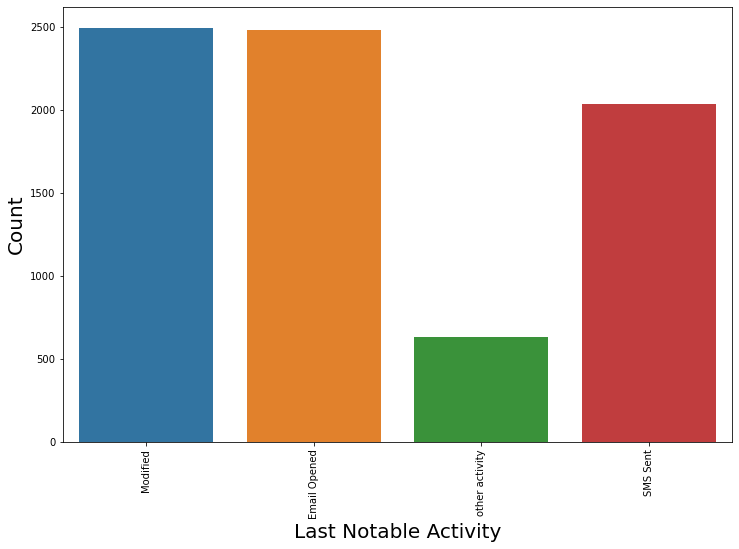

In [40]:
plt.figure(figsize=[12,8])
sns.countplot(df_3['Last Notable Activity'])
plt.xticks(rotation=90)
plt.xlabel('Last Notable Activity',size=20)
plt.ylabel('Count',size=20)
plt.show()

- Major acivity performed lastly were 'Modified','Email Opened','SMS Sent'.


In [41]:
# For the feature 'What is your current occupation' majority of the people are unemployed so we can merge other values to 'other occupation'.

df_3['What is your current occupation']=df_3['What is your current occupation'].replace(['Working Professional','Student','Other','Housewife','Businessman'],'other occupation')

In [42]:
df_3['What is your current occupation'].value_counts()

Unemployed          6746
other occupation     897
Name: What is your current occupation, dtype: int64

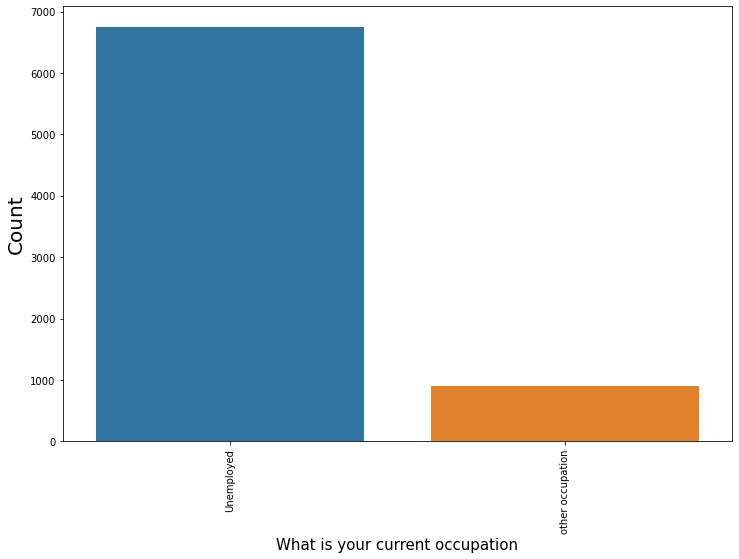

In [43]:
plt.figure(figsize=[12,8])
sns.countplot(df_3['What is your current occupation'])
plt.xticks(rotation=90)
plt.xlabel('What is your current occupation',size=15)
plt.ylabel('Count',size=20)
plt.show()

- Majority of the people are unemployed.

In [44]:
# For the feature 'What matters most to you in choosing a course' majority of the values are Better Carrer Prospects so, we can merge other values as they are very less in counts.

df_3['What matters most to you in choosing a course']=df_3['What matters most to you in choosing a course'].replace(['Flexibility & Convenience','Other'],'other')

In [45]:
df_3['What matters most to you in choosing a course'].value_counts()

Better Career Prospects    7641
other                         2
Name: What matters most to you in choosing a course, dtype: int64

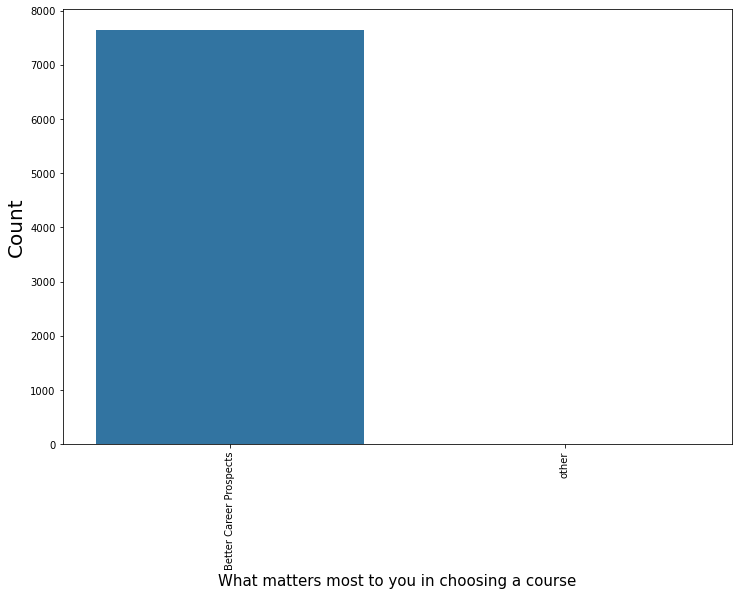

In [46]:
plt.figure(figsize=[12,8])
sns.countplot(df_3['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.xlabel('What matters most to you in choosing a course',size=15)
plt.ylabel('Count',size=20)
plt.show()



- Almost all people are taking this course for 'Better Carrer Prospects'

# Bivarient Analysis

In [47]:
df_3.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,other occupation,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified


Text(0, 0.5, 'TotalVisits')

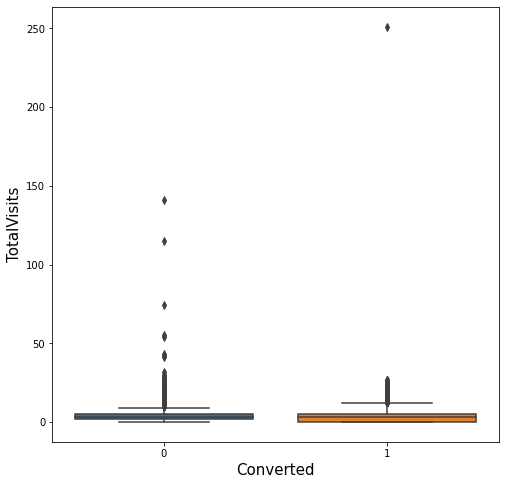

In [48]:
plt.figure(figsize=[8,8])
sns.boxplot(y=df_3['TotalVisits'],x=df_3['Converted'],data=df_3)
plt.xlabel('Converted',size=15)
plt.ylabel('TotalVisits',size=15)

- Those who have shown interest in course has max visits = 50-75 Where as those who has not shown interest has more than 75 visits.  

Text(0, 0.5, 'Total Time Spent on Website')

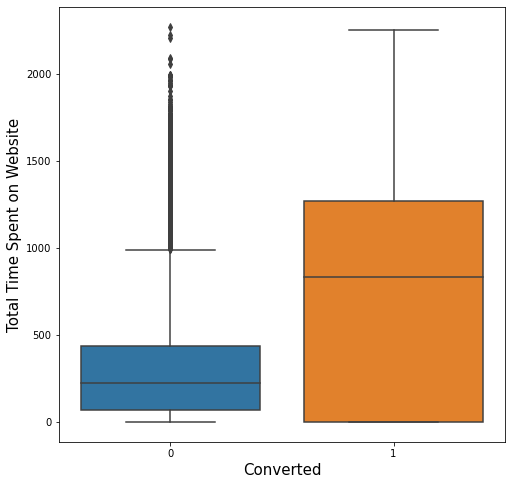

In [49]:
plt.figure(figsize=[8,8])
sns.boxplot(y=df_3['Total Time Spent on Website'],x=df_3['Converted'],data=df_3)
plt.xlabel('Converted',size=15)
plt.ylabel('Total Time Spent on Website',size=15)

- The avg time spend by those customers who have taken the course is around 800 while those who have not taken is around 250. So more the time spend by customer, more the chance that he will take the course. 

Text(0, 0.5, 'Page Views Per Visit')

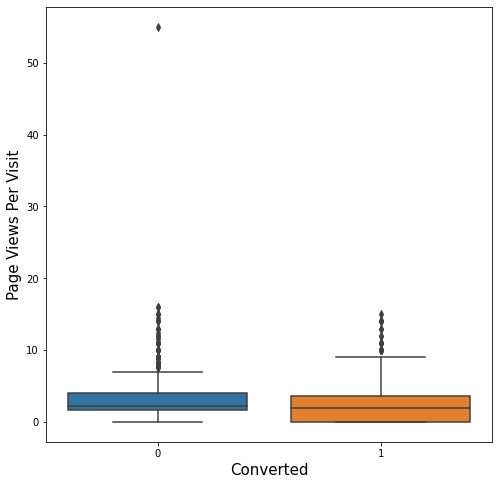

In [50]:
plt.figure(figsize=[8,8])
sns.boxplot(y=df_3['Page Views Per Visit'],x=df_3['Converted'],data=df_3)
plt.xlabel('Converted',size=15)
plt.ylabel('Page Views Per Visit',size=15)

- There is no much evidence upon 'page views per visit' on wheather the customer has taken the course or not.

Text(0.5, 0, 'Lead Source')

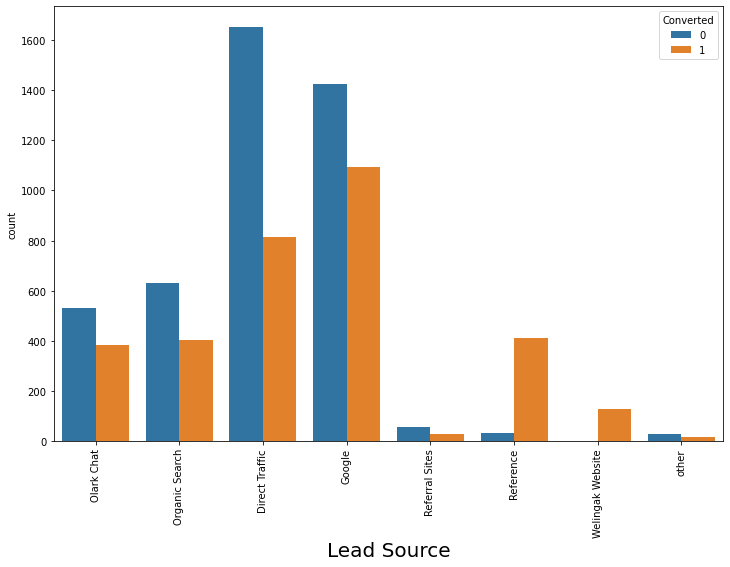

In [51]:
plt.figure(figsize=[12,8])
sns.countplot(df_3['Lead Source'],hue=df_3['Converted'])
plt.xticks(rotation=90)
plt.xlabel('Lead Source',size=20)


- We observe that those whose Lead source is 'Reference' and 'Welingak Website' are more likely to take the course. 

Text(0.5, 0, 'Specialization')

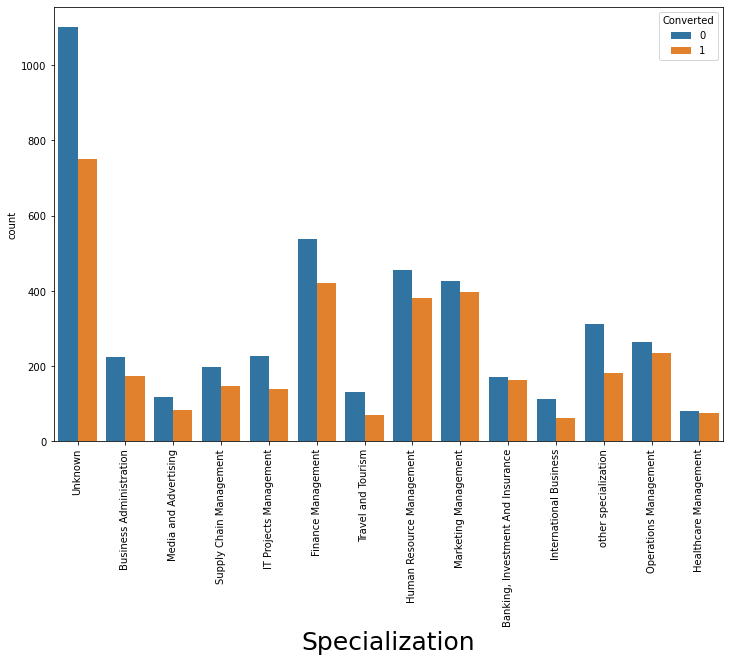

In [52]:
plt.figure(figsize=[12,8])
sns.countplot(df_3['Specialization'],hue=df_3['Converted'])
plt.xticks(rotation=90)
plt.xlabel('Specialization',size=25)

- There is not much insights from Specialization feature.

Text(0.5, 0, 'What is your current occupation')

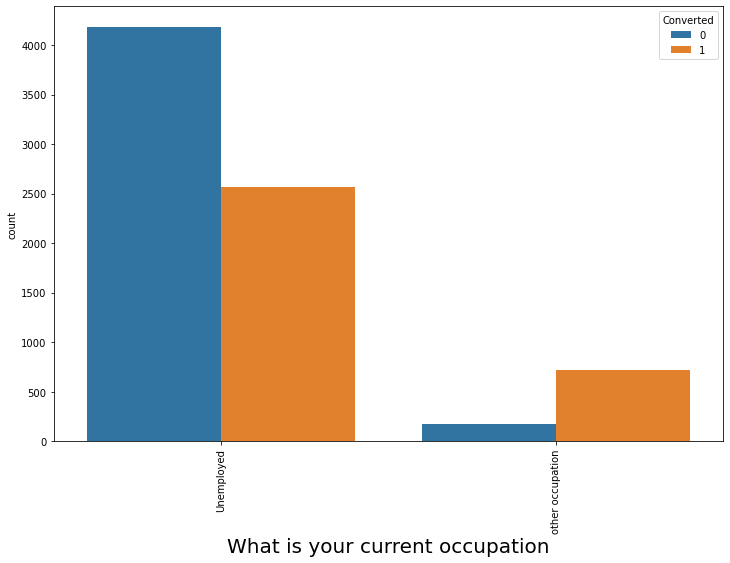

In [53]:
plt.figure(figsize=[12,8])
sns.countplot(df_3['What is your current occupation'],hue=df_3['Converted'])
plt.xticks(rotation=90)
plt.xlabel('What is your current occupation',size=20)

- We observe that working proffesional is the major segment to take the course. 

Text(0.5, 0, 'Last Notable Activity')

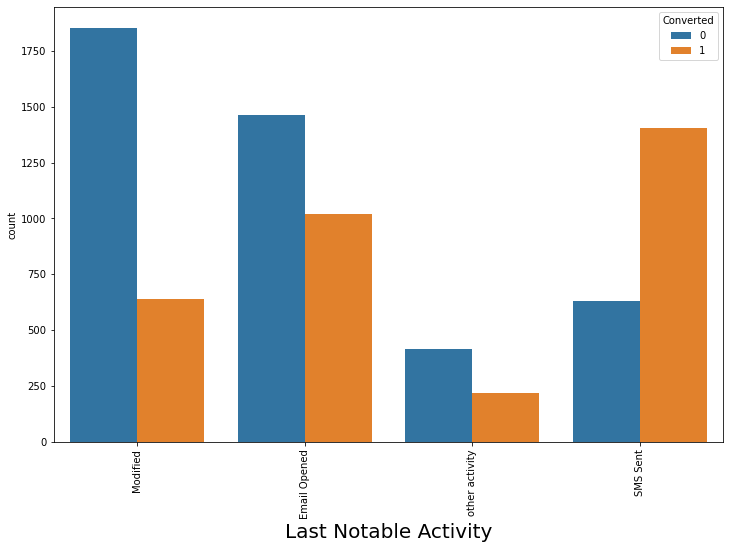

In [54]:
plt.figure(figsize=[12,8])
sns.countplot(df_3['Last Notable Activity'],hue=df_3['Converted'])
plt.xticks(rotation=90)
plt.xlabel('Last Notable Activity',size=20)

- When the last activity is 'SMS Sent' then the customer is more likely to take the course.

In [55]:
df_3.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [56]:
# Heatmap
col_1=df_3[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
col_2=df_3[['Converted','Do Not Email','Do Not Call','Search','Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']]

<AxesSubplot:>

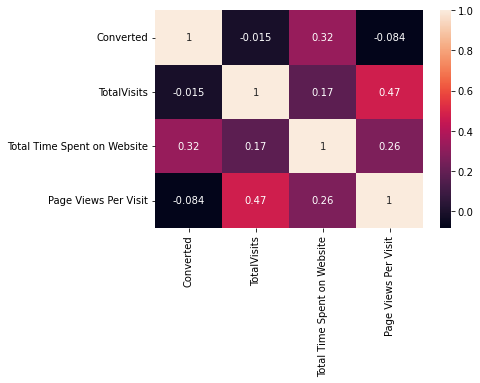

In [57]:
sns.heatmap(col_1.corr(),annot=True)

- The target variable 'Converted' has very good relationship with 'Total Time Spend On Website' but has negative correlation with 'Totalvisits' and 'Page Views per Visit'.

In [58]:
df_3.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,other occupation,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified


In [59]:
df_3['A free copy of Mastering The Interview'].value_counts()

0    4757
1    2886
Name: A free copy of Mastering The Interview, dtype: int64

In [60]:
# For the feature 'Country' the value India has the highest frequency combining all the other values so merging all the other values together.

df_3['Country']=df_3['Country'].replace(['Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'United Kingdom', 'Bahrain', 'Singapore', 'Qatar',
       'Australia', 'Ghana', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Uganda', 'Kenya', 'South Africa',
       'Tanzania', 'Malaysia', 'Liberia', 'Italy', 'Switzerland',
       'Denmark', 'Philippines', 'Bangladesh', 'Vietnam', 'Indonesia'],'other country')

<AxesSubplot:xlabel='Country', ylabel='count'>

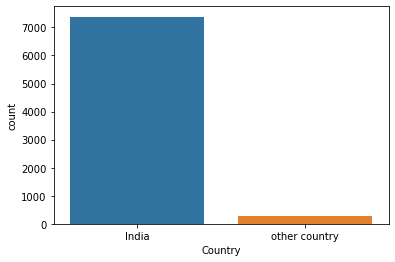

In [61]:
sns.countplot(df_3.Country)

In [62]:
# We find that some features have very high data imbalance so better to drop those columns because it will not be good for model predictions.

df_4=df_3.drop(['Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],axis=1)

In [63]:
df_4.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unemployed,Better Career Prospects,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,other occupation,Better Career Prospects,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,0,Modified


# Creating dummy variables

- ['Lead origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']

In [64]:
Lead_Origin=pd.get_dummies(df_4['Lead Origin'],drop_first=True)

In [65]:
Lead_Origin.head()

,Landing Page Submission,Lead Add Form,Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [66]:
Lead_Source=pd.get_dummies(df_4['Lead Source'],drop_first=True)
Lead_Source.head()

,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [67]:
# Also for the feature last activity their are some values which can be merge for ease of model predictions.

df_4['Last Activity']=df_4['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow'],'other last activity')

In [68]:
Last_Activity=pd.get_dummies(df_4['Last Activity'],drop_first=True)
Last_Activity.head()

,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,other last activity
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0


In [69]:
df_4['Last Activity'].value_counts()

Email Opened               2989
SMS Sent                   2524
Page Visited on Website     566
Olark Chat Conversation     463
Converted to Lead           350
other last activity         289
Email Bounced               257
Email Link Clicked          205
Name: Last Activity, dtype: int64

In [70]:
Country=pd.get_dummies(df_4['Country'])

In [71]:
Country

,India,other country
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9235,0,1
9236,1,0
9237,1,0
9238,1,0


In [72]:
Specialization=pd.get_dummies(df_4['Specialization'],drop_first=True)
Specialization

,Business Administration,Finance Management,Healthcare Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Unknown,other specialization
0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,1,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,1,0,0,0,0,0
9237,1,0,0,0,0,0,0,0,0,0,0,0,0
9238,0,0,0,1,0,0,0,0,0,0,0,0,0


In [73]:
Current_Occupation=pd.get_dummies(df_4['What is your current occupation'])
Current_Occupation

,Unemployed,other occupation
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
9235,1,0
9236,1,0
9237,1,0
9238,1,0


In [74]:
Choosing_Course=pd.get_dummies(df_4['What matters most to you in choosing a course'])
Choosing_Course

,Better Career Prospects,other
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9235,1,0
9236,1,0
9237,1,0
9238,1,0


In [75]:
Last_Notable_Activity=pd.get_dummies(df_4['Last Notable Activity'])
Last_Notable_Activity

,Email Opened,Modified,SMS Sent,other activity
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
9235,0,0,0,1
9236,0,0,1,0
9237,0,0,1,0
9238,0,0,1,0


# Concating the dummy variables.

In [76]:
df_5=pd.concat([df_4,Lead_Origin,Lead_Source,Last_Activity,Country,Specialization,Current_Occupation,Choosing_Course,Last_Notable_Activity],axis=1)

In [77]:
df_5.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,other last activity,India,other country,Business Administration,Finance Management,Healthcare Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Unknown,other specialization,Unemployed,other occupation,Better Career Prospects,other,Email Opened,Modified,SMS Sent,other activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unemployed,Better Career Prospects,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,other occupation,Better Career Prospects,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,other last activity,India,Media and Advertising,Unemployed,Better Career Prospects,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0


# Dropping the un-neccessary features

In [78]:
df_6=df_5.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity'],axis=1)

In [79]:
df_6.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,other last activity,India,other country,Business Administration,Finance Management,Healthcare Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Unknown,other specialization,Unemployed,other occupation,Better Career Prospects,other,Email Opened,Modified,SMS Sent,other activity
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0


In [80]:
df_6.shape

(7643, 47)

- Now we have 47 features and 7643 rows as our final data-set table.

# Spliting the data into Train_Test_Split

In [81]:
# importing required library

from sklearn.model_selection import train_test_split

In [82]:
X=df_6.drop('Converted',axis=1)
y=df_6.Converted

In [83]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,other last activity,India,other country,Business Administration,Finance Management,Healthcare Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Unknown,other specialization,Unemployed,other occupation,Better Career Prospects,other,Email Opened,Modified,SMS Sent,other activity
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0


In [84]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=50,train_size=0.70)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5350, 46)
(2293, 46)
(5350,)
(2293,)


# Standardising the Features

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [89]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,other last activity,India,other country,Business Administration,Finance Management,Healthcare Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Unknown,other specialization,Unemployed,other occupation,Better Career Prospects,other,Email Opened,Modified,SMS Sent,other activity
5218,0,0,0.942774,0.793391,0.850988,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2366,0,0,0.942774,-0.082925,0.850988,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
7083,0,0,0.035869,-0.948445,-0.288235,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
9051,0,0,0.398631,0.492888,0.167454,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0
8641,0,0,-0.689654,-0.966439,-1.199613,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [90]:
# Same we will do on test_side
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [91]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,other last activity,India,other country,Business Administration,Finance Management,Healthcare Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Unknown,other specialization,Unemployed,other occupation,Better Career Prospects,other,Email Opened,Modified,SMS Sent,other activity
7928,0,0,0.042378,-0.234219,0.679133,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
7517,0,0,-0.977819,-0.952402,-1.272904,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1705,0,0,-0.212671,0.061396,0.191124,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
4684,0,0,0.297428,-0.553411,1.167143,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
8189,0,0,3.868120,-0.471800,0.581531,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [92]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,other last activity,India,other country,Business Administration,Finance Management,Healthcare Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Unknown,other specialization,Unemployed,other occupation,Better Career Prospects,other,Email Opened,Modified,SMS Sent,other activity
5218,0,0,0.942774,0.793391,0.850988,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2366,0,0,0.942774,-0.082925,0.850988,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
7083,0,0,0.035869,-0.948445,-0.288235,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
9051,0,0,0.398631,0.492888,0.167454,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0
8641,0,0,-0.689654,-0.966439,-1.199613,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [93]:
# Checking the Conversion rate after preparing the data

(df_6.Converted.sum()/len(df_6.Converted))*100

42.96742116969776

- The Conversion rate of costumer is 42.96 %. We have to improve this conversion rate to atlest 80%.

# Building the Model

In [94]:
import statsmodels.api as sm

In [95]:
model_1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5307
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 14 Nov 2022   Deviance:                   1.5658e+05
Time:                        20:47:42   Pearson chi2:                 7.66e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -7.129e+14   1.25e+07  -5.72e+07      0.000   -7.13e+14   -7.13e+14
Do Not Email                           -3.353e+14   4.34e+06  -7.73e+07      0.000   -3.35e+14   -3.35e+14
Do Not Call                             5.411e+15   6.73e+07   8.04e+07      0.000    5.41e+15    5.41e+15
TotalVisits                             9.162e+13   1.06e+06   8.62e+07      0.000    9.16e+13    9.16e+13
Total Time Spent on Website             6.707e+14   1.03e+06    6.5e+08      0.000    6.71e+14    6.71e+14
Page Views Per Visit                    -1.23e+14   1.25e+06  -9.86e+07      0.000   -1.23e+14   -1.23e+14
A free copy of Mastering The Interview -2.192e+14   2.74e+06  -8.01e+07      0.000   -2.19e+14   -2.19e+14
Landing Page Submission                 3.516e+14   3.55e+06    9.9e+07      0.000    3.52e+14    3.52e+14
Lead Add Form                           8.861e+14   2.64e+07   3.36e+07      0.000    8.86e+14    8.86e+14
Lead Import                             4.177e+14   2.36e+07   1.77e+07      0.000    4.18e+14    4.18e+14
Google                                  1.648e+14   2.96e+06   5.57e+07      0.000    1.65e+14    1.65e+14
Olark Chat                             -1.855e+14    4.5e+06  -4.13e+07      0.000   -1.86e+14   -1.86e+14
Organic Search                          1.056e+14   3.28e+06   3.22e+07      0.000    1.06e+14    1.06e+14
Reference                               1.047e+15   2.67e+07   3.92e+07      0.000    1.05e+15    1.05e+15
Referral Sites                          2.709e+14   9.08e+06   2.98e+07      0.000    2.71e+14    2.71e+14
Welingak Website                        1.849e+15   2.74e+07   6.75e+07      0.000    1.85e+15    1.85e+15
other                                    2.03e+14   1.82e+07   1.11e+07      0.000    2.03e+14    2.03e+14
Email Bounced                          -7.115e+14   7.64e+06  -9.31e+07      0.000   -7.11e+14   -7.11e+14
Email Link Clicked                      1.614e+14   7.31e+06   2.21e+07      0.000    1.61e+14    1.61e+14
Email Opened                             2.71e+14   5.63e+06   4.81e+07      0.000    2.71e+14    2.71e+14
Olark Chat Conversation                -1.163e+14   6.06e+06  -1.92e+07      0.000   -1.16e+14   -1.16e+14
Page Visited on Website                -2.168e+13    5.9e+06  -3.68e+06      0.000   -2.17e+13   -2.17e+13
SMS Sent                                5.228e+14   5.67e+06   9.22e+07      0.000    5.23e+14    5.23e+14
other last activity                     1.797e+14   6.61e+06   2.72e+07      0.000     1.8e+14     1.8e+14
India                                  -2.835e+14   6.56e+06  -4.32e+07      0.000   -2.84e+14   -2.84e+14
other country                          -4.294e+14    6.9e+06  -6.22e+07      0.000   -4

In [96]:
y_train.head()

5218    0
2366    0
7083    0
9051    0
8641    1
Name: Converted, dtype: int64

# Feature Selection Using RFE

In [97]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [98]:
from sklearn.feature_selection import RFE
rfe=RFE(lr,20)
rfe=rfe.fit(X_train,y_train)

In [99]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 2),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Lead Import', True, 1),
 ('Google', False, 11),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 17),
 ('Reference', True, 1),
 ('Referral Sites', False, 5),
 ('Welingak Website', True, 1),
 ('other', False, 10),
 ('Email Bounced', True, 1),
 ('Email Link Clicked', False, 6),
 ('Email Opened', True, 1),
 ('Olark Chat Conversation', True, 1),
 ('Page Visited on Website', False, 19),
 ('SMS Sent', True, 1),
 ('other last activity', True, 1),
 ('India', False, 3),
 ('other country', False, 15),
 ('Business Administration', False, 22),
 ('Finance Management', False, 14),
 ('Healthcare Management', False, 4),
 ('Human Resource Management', False, 12),
 ('IT Projects Management', False, 20),
 ('Internat

In [100]:
# Selecting the top 15 features as per rfe and own analysis.

col=['Do Not Email','Total Time Spent on Website','Landing Page Submission','Lead Add Form','Lead Import','Olark Chat','Reference','Welingak Website','Email Bounced','Email Opened','Olark Chat Conversation','SMS Sent','other last activity','Unemployed','other occupation','Modified']

In [101]:
X_train_sm = sm.add_constant(X_train[col])
model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5332
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2399.3
Date:                Mon, 14 Nov 2022   Deviance:                       4798.7
Time:                        20:47:48   Pearson chi2:                 5.36e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1008      0.110      0.916      0.360      -0.115       0.316
Do Not Email                   -1.6066      0.209     -7.696      0.000      -2.016      -1.197
Total Time Spent on Website     1.1001      0.042     26.431      0.000       1.019       1.182
Landing Page Submission        -0.4417      0.097     -4.558      0.000      -0.632      -0.252
Lead Add Form                   2.0082      0.877      2.289      0.022       0.289       3.728
Lead Import                     0.6824      0.519      1.314      0.189      -0.336       1.700
Olark Chat                      1.1584      0.135      8.588      0.000       0.894       1.423
Reference                       1.5048      0.902      1.668      0.095      -0.264       3.273
Welingak Website                3.3193      1.136      2.923      0.003       1.094       5.545
Email Bounced                  -0.2495      0.419     -0.596      0.551      -1.070       0.571
Email Opened                    0.9516      0.182      5.229      0.000       0.595       1.308
Email Opened                   -0.8337      0.217     -3.850      0.000      -1.258      -0.409
Olark Chat Conversation        -0.6179      0.215     -2.874      0.004      -1.039      -0.196
SMS Sent                        1.0244      0.189      5.419      0.000       0.654       1.395
SMS Sent                        0.2497      0.225      1.109      0.267      -0.191       0.691
other last activity             1.0670      0.211      5.066      0.000       0.654       1.480
Unemployed                     -0.8159      0.069    -11.762      0.000      -0.952      -0.680
other occupation                0.9167      0.096      9.501      0.000       0.728       1.106
Modified                       -1.1116      0.162     -6.846      0.000      -1.430      -0.793
===============================================================================================
"""

- The feature 'Email Bounced' has very high p-value, so we have to drop it.

In [102]:
# Building model 3

col_2=['Do Not Email','Total Time Spent on Website','Landing Page Submission','Lead Add Form','Lead Import','Olark Chat','Reference','Welingak Website','Email Opened','Olark Chat Conversation','SMS Sent','other last activity','Unemployed','other occupation','Modified']
X_train_sm = sm.add_constant(X_train[col_2])
model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5333
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2399.5
Date:                Mon, 14 Nov 2022   Deviance:                       4799.0
Time:                        20:47:49   Pearson chi2:                 5.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0931      0.109      0.852      0.394      -0.121       0.307
Do Not Email                   -1.6590      0.190     -8.712      0.000      -2.032      -1.286
Total Time Spent on Website     1.1002      0.042     26.433      0.000       1.019       1.182
Landing Page Submission        -0.4417      0.097     -4.558      0.000      -0.632      -0.252
Lead Add Form                   2.0088      0.877      2.290      0.022       0.289       3.728
Lead Import                     0.6819      0.519      1.313      0.189      -0.336       1.700
Olark Chat                      1.1568      0.135      8.579      0.000       0.893       1.421
Reference                       1.5092      0.902      1.673      0.094      -0.259       3.277
Welingak Website                3.3151      1.135      2.921      0.003       1.090       5.540
Email Opened                    0.9680      0.180      5.375      0.000       0.615       1.321
Email Opened                   -0.8390      0.216     -3.880      0.000      -1.263      -0.415
Olark Chat Conversation        -0.6013      0.213     -2.818      0.005      -1.020      -0.183
SMS Sent                        1.0431      0.187      5.589      0.000       0.677       1.409
SMS Sent                        0.2451      0.225      1.090      0.276      -0.196       0.686
other last activity             1.0899      0.207      5.255      0.000       0.683       1.496
Unemployed                     -0.8191      0.069    -11.840      0.000      -0.955      -0.683
other occupation                0.9122      0.096      9.489      0.000       0.724       1.101
Modified                       -1.1170      0.162     -6.896      0.000      -1.434      -0.800
===============================================================================================
"""

- Still the variable 'SMS Sent' has very high p-value so we have to drop it.

In [103]:
# Building model 4

col_3=['Do Not Email','Total Time Spent on Website','Landing Page Submission','Lead Add Form','Lead Import','Olark Chat','Reference','Welingak Website','Email Opened','Olark Chat Conversation','other last activity','Unemployed','other occupation','Modified']
X_train_sm = sm.add_constant(X_train[col_3])
model_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5335
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2449.1
Date:                Mon, 14 Nov 2022   Deviance:                       4898.3
Time:                        20:47:49   Pearson chi2:                 5.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7583      0.075     10.072      0.000       0.611       0.906
Do Not Email                   -1.8967      0.184    -10.298      0.000      -2.258      -1.536
Total Time Spent on Website     1.1072      0.041     26.892      0.000       1.026       1.188
Landing Page Submission        -0.4254      0.095     -4.467      0.000      -0.612      -0.239
Lead Add Form                   2.0285      0.886      2.289      0.022       0.292       3.765
Lead Import                     0.7989      0.523      1.528      0.126      -0.226       1.823
Olark Chat                      1.2085      0.133      9.056      0.000       0.947       1.470
Reference                       1.6121      0.910      1.771      0.077      -0.172       3.397
Welingak Website                3.5059      1.144      3.064      0.002       1.263       5.748
Email Opened                    0.4429      0.159      2.785      0.005       0.131       0.755
Email Opened                   -1.3466      0.178     -7.585      0.000      -1.695      -0.999
Olark Chat Conversation        -1.2861      0.202     -6.376      0.000      -1.681      -0.891
other last activity             0.4460      0.196      2.279      0.023       0.062       0.830
Unemployed                     -0.4719      0.055     -8.618      0.000      -0.579      -0.365
other occupation                1.2302      0.088     14.054      0.000       1.059       1.402
Modified                       -1.6276      0.104    -15.580      0.000      -1.832      -1.423
===============================================================================================
"""

- Still the variable 'Lead Import' has very high p-value so droping it.

In [104]:
# Building model 5

col_4=['Do Not Email','Total Time Spent on Website','Landing Page Submission','Lead Add Form','Olark Chat','Reference','Welingak Website','Email Opened','Olark Chat Conversation','other last activity','Unemployed','other occupation','Modified']
X_train_sm = sm.add_constant(X_train[col_4])
model_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5336
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2450.2
Date:                Mon, 14 Nov 2022   Deviance:                       4900.4
Time:                        20:47:49   Pearson chi2:                 5.39e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7690      0.075     10.263      0.000       0.622       0.916
Do Not Email                   -1.8948      0.184    -10.295      0.000      -2.255      -1.534
Total Time Spent on Website     1.1021      0.041     26.896      0.000       1.022       1.182
Landing Page Submission        -0.4424      0.094     -4.684      0.000      -0.628      -0.257
Lead Add Form                   2.0073      0.885      2.268      0.023       0.273       3.742
Olark Chat                      1.1859      0.132      8.955      0.000       0.926       1.445
Reference                       1.6092      0.910      1.769      0.077      -0.174       3.392
Welingak Website                3.5035      1.144      3.064      0.002       1.262       5.745
Email Opened                    0.4458      0.159      2.802      0.005       0.134       0.758
Email Opened                   -1.3428      0.178     -7.564      0.000      -1.691      -0.995
Olark Chat Conversation        -1.2899      0.202     -6.398      0.000      -1.685      -0.895
other last activity             0.4436      0.196      2.268      0.023       0.060       0.827
Unemployed                     -0.4674      0.055     -8.553      0.000      -0.575      -0.360
other occupation                1.2364      0.087     14.141      0.000       1.065       1.408
Modified                       -1.6243      0.104    -15.560      0.000      -1.829      -1.420
===============================================================================================
"""

- Still the variable 'reference' has very high p-value so droping it.

In [105]:
# Building model 6

col_5=['Do Not Email','Total Time Spent on Website','Landing Page Submission','Lead Add Form','Olark Chat','Welingak Website','Email Opened','Olark Chat Conversation','other last activity','Unemployed','other occupation','Modified']
X_train_sm = sm.add_constant(X_train[col_5])
model_6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model_6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5337
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2451.5
Date:                Mon, 14 Nov 2022   Deviance:                       4902.9
Time:                        20:47:49   Pearson chi2:                 5.39e+03
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7706      0.075     10.283      0.000       0.624       0.917
Do Not Email                   -1.8904      0.184    -10.293      0.000      -2.250      -1.530
Total Time Spent on Website     1.1017      0.041     26.884      0.000       1.021       1.182
Landing Page Submission        -0.4435      0.094     -4.694      0.000      -0.629      -0.258
Lead Add Form                   3.5459      0.237     14.941      0.000       3.081       4.011
Olark Chat                      1.1833      0.133      8.927      0.000       0.923       1.443
Welingak Website                1.9622      0.759      2.585      0.010       0.474       3.450
Email Opened                    0.4419      0.159      2.779      0.005       0.130       0.754
Email Opened                   -1.3397      0.177     -7.549      0.000      -1.688      -0.992
Olark Chat Conversation        -1.2909      0.202     -6.404      0.000      -1.686      -0.896
other last activity             0.4426      0.195      2.264      0.024       0.060       0.826
Unemployed                     -0.4681      0.055     -8.569      0.000      -0.575      -0.361
other occupation                1.2387      0.087     14.176      0.000       1.067       1.410
Modified                       -1.6226      0.104    -15.557      0.000      -1.827      -1.418
===============================================================================================
"""

- So the hypothesis testing on variables is done and all the p-values of features are less than 0.05 so we can contiue wth this model.

# Checking the VIF of model_6

In [106]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_5].values, i) for i in range(X_train[col_5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Unemployed,7.39
7,Email Opened,5.67
6,Email Opened,4.88
11,other occupation,1.89
3,Lead Add Form,1.78
2,Landing Page Submission,1.76
12,Modified,1.67
4,Olark Chat,1.64
5,Welingak Website,1.29
8,Olark Chat Conversation,1.26


- The Correlation between variable 'Unemployed' is very high with other variables so we have to drop these variable. 

In [108]:
# Building model 7

col_6=['Do Not Email','Total Time Spent on Website','Landing Page Submission','Lead Add Form','Olark Chat','Welingak Website','Email Opened','Olark Chat Conversation','other last activity','other occupation','Modified']
X_train_sm = sm.add_constant(X_train[col_6])
model_7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model_7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5337
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2451.5
Date:                Mon, 14 Nov 2022   Deviance:                       4902.9
Time:                        20:47:50   Pearson chi2:                 5.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3025      0.098      3.093      0.002       0.111       0.494
Do Not Email                   -1.8904      0.184    -10.293      0.000      -2.250      -1.530
Total Time Spent on Website     1.1017      0.041     26.884      0.000       1.021       1.182
Landing Page Submission        -0.4435      0.094     -4.694      0.000      -0.629      -0.258
Lead Add Form                   3.5459      0.237     14.941      0.000       3.081       4.011
Olark Chat                      1.1833      0.133      8.927      0.000       0.923       1.443
Welingak Website                1.9622      0.759      2.585      0.010       0.474       3.450
Email Opened                    0.4419      0.159      2.779      0.005       0.130       0.754
Email Opened                   -1.3397      0.177     -7.549      0.000      -1.688      -0.992
Olark Chat Conversation        -1.2909      0.202     -6.404      0.000      -1.686      -0.896
other last activity             0.4426      0.195      2.264      0.024       0.060       0.826
other occupation                1.7068      0.125     13.655      0.000       1.462       1.952
Modified                       -1.6226      0.104    -15.557      0.000      -1.827      -1.418
===============================================================================================
"""

In [109]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_6].values, i) for i in range(X_train[col_6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Email Opened,8.12
6,Email Opened,8.01
2,Landing Page Submission,2.16
11,Modified,2.16
3,Lead Add Form,1.55
4,Olark Chat,1.37
5,Welingak Website,1.31
8,Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.20
0,Do Not Email,1.19


- We also have to drop variable e-mail opened because it has very high correlation with other variables.

In [110]:
# Building model 8

col_7=['Do Not Email','Total Time Spent on Website','Landing Page Submission','Lead Add Form','Olark Chat','Welingak Website','Olark Chat Conversation','other last activity','other occupation','Modified']
X_train_sm = sm.add_constant(X_train[col_7])
model_8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model_8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5339
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.9
Date:                Mon, 14 Nov 2022   Deviance:                       5027.7
Time:                        20:47:50   Pearson chi2:                 5.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1642      0.086     -1.908      0.056      -0.333       0.004
Do Not Email                   -1.5974      0.177     -9.006      0.000      -1.945      -1.250
Total Time Spent on Website     1.1087      0.040     27.419      0.000       1.029       1.188
Landing Page Submission        -0.4461      0.093     -4.783      0.000      -0.629      -0.263
Lead Add Form                   3.6088      0.237     15.251      0.000       3.145       4.073
Olark Chat                      1.1996      0.131      9.166      0.000       0.943       1.456
Welingak Website                1.9414      0.755      2.572      0.010       0.462       3.421
Olark Chat Conversation        -1.2131      0.194     -6.252      0.000      -1.593      -0.833
other last activity             0.4830      0.189      2.557      0.011       0.113       0.853
other occupation                1.6963      0.124     13.725      0.000       1.454       1.939
Modified                       -1.0682      0.083    -12.850      0.000      -1.231      -0.905
===============================================================================================
"""

In [111]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_7].values, i) for i in range(X_train[col_7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Modified,1.57
3,Lead Add Form,1.49
2,Landing Page Submission,1.45
5,Welingak Website,1.31
4,Olark Chat,1.25
6,Olark Chat Conversation,1.25
1,Total Time Spent on Website,1.20
8,other occupation,1.19
0,Do Not Email,1.14
7,other last activity,1.08


- So there is no major multicolliniarity between variables so, Model 8 is our final model.

# Predicting the y variable

In [112]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5218    0.566932
2366    0.331323
7083    0.354044
9051    0.484052
8641    0.986803
1086    0.264579
5412    0.573251
3003    0.487814
7845    0.556912
8168    0.233084
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.56693215, 0.33132308, 0.3540438 , 0.48405156, 0.98680342,
       0.26457926, 0.57325103, 0.48781374, 0.55691219, 0.23308449])

### Creating a data frame for conversion probability of customers.

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = df['Lead Number']
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead Number
0,0,0.566932,660737
1,0,0.331323,660728
2,0,0.354044,660727
3,0,0.484052,660719
4,1,0.986803,660681
5,0,0.264579,660680
6,1,0.573251,660673
7,0,0.487814,660664
8,1,0.556912,660624
9,0,0.233084,660616


### Setting a threshold value of probability as 0.5 for converting the lead. 

In [115]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.566932,660737,1
1,0,0.331323,660728,0
2,0,0.354044,660727,0
3,0,0.484052,660719,0
4,1,0.986803,660681,1
5,0,0.264579,660680,0
6,1,0.573251,660673,1
7,0,0.487814,660664,0
8,1,0.556912,660624,1
9,0,0.233084,660616,0


# Now checking the accuracy of model.

In [116]:
from sklearn import metrics

In [117]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[2593  448]
 [ 735 1574]]


In [118]:
#                                  Predicted

#Actual                  not_Converted  Converted
        # not_Converted        2593       448  
        # Converted            735        1574

In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7788785046728972


- The accuracy of our model is 77.78 %

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity= ',TP / float(TP+FN))

Sensitivity=  0.6816803811173668


- We have to lower the False Positive value for incresing the accuracy of model.

In [122]:
# Let us calculate specificity
print('specificity = ',TN / float(TN+FP))

specificity =  0.8526800394607037


In [123]:
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Postive Rate = ',FP/ float(TN+FP))

False Postive Rate =  0.14731996053929627


In [124]:
# positive predictive value 
print ('positive predictive value = ',TP / float(TP+FP))

positive predictive value =  0.7784371909000989


In [125]:
# Negative predictive value
print ('Negative predictive value = ',TN / float(TN+ FN))

Negative predictive value =  0.7791466346153846


# Ploting R.O.C Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

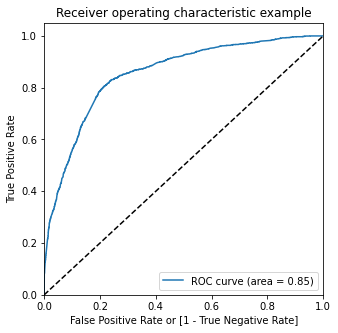

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Finding the Thresold Point

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.566932,660737,1,1,1,1,1,1,1,0,0,0,0
1,0,0.331323,660728,0,1,1,1,1,0,0,0,0,0,0
2,0,0.354044,660727,0,1,1,1,1,0,0,0,0,0,0
3,0,0.484052,660719,0,1,1,1,1,1,0,0,0,0,0
4,1,0.986803,660681,1,1,1,1,1,1,1,1,1,1,1


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.431589  1.000000  0.000000
0.1   0.1  0.562804  0.974015  0.250575
0.2   0.2  0.673645  0.931139  0.478132
0.3   0.3  0.770467  0.854916  0.706347
0.4   0.4  0.793645  0.806410  0.783953
0.5   0.5  0.778879  0.681680  0.852680
0.6   0.6  0.758131  0.589866  0.885893
0.7   0.7  0.732897  0.478562  0.926011
0.8   0.8  0.698692  0.353833  0.960539
0.9   0.9  0.660000  0.230836  0.985860


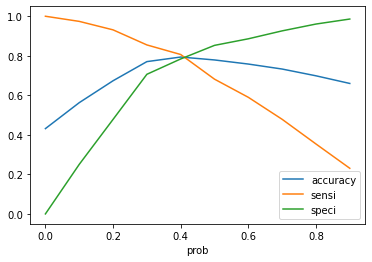

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- The Thresold point is near to 0.4 for getting the best results.

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.566932,660737,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.331323,660728,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.354044,660727,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.484052,660719,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.986803,660681,1,1,1,1,1,1,1,1,1,1,1,1


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7936448598130841

#### The accuracy score in increased from 77.78% to 79.36% with probability 0.5 to 0.4

In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2384,  657],
       [ 447, 1862]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
print('sensitivity = ',TP / float(TP+FN))

sensitivity =  0.8064097011693374


In [137]:
# Let us calculate specificity
print('specificity = ',TN / float(TN+FP))

specificity =  0.7839526471555409


In [138]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print('false postive rate = ',FP/ float(TN+FP))

false postive rate =  0.21604735284445906


In [139]:
# Positive predictive value 
print ('Positive predictive value = ',TP / float(TP+FP))

Positive predictive value =  0.7391822151647479


In [140]:
# Negative predictive value
print (' Negative predictive value = ',TN / float(TN+ FN))

 Negative predictive value =  0.8421052631578947


### --> so we can conclude that our model is capable of predicting 80.64% of the costumers correctly weather they are a potential customer or not.

#  Making predictions on the test set

In [141]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,other last activity,India,other country,Business Administration,Finance Management,Healthcare Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Unknown,other specialization,Unemployed,other occupation,Better Career Prospects,other,Email Opened,Modified,SMS Sent,other activity
7928,0,0,0.042378,-0.234219,0.679133,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
7517,0,0,-0.977819,-0.952402,-1.272904,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1705,0,0,-0.212671,0.061396,0.191124,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
4684,0,0,0.297428,-0.553411,1.167143,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
8189,0,0,3.868120,-0.471800,0.581531,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [142]:
X_test_sm = sm.add_constant(X_test)

In [143]:
col_7=['Do Not Email','Total Time Spent on Website','Landing Page Submission','Lead Add Form','Olark Chat','Welingak Website','Olark Chat Conversation','other last activity','other occupation','Modified']
X_test_sm = sm.add_constant(X_test[col_7])
model_pred = sm.GLM(y_test,X_test_sm, family = sm.families.Binomial())
res_pred = model_pred.fit()


In [144]:
y_test_pred = res_pred.predict(X_test_sm)

In [145]:
y_test_pred[:10]

7928    0.263903
7517    0.451341
1705    0.332356
4684    0.200978
8189    0.184304
6136    0.084565
1899    0.865513
8525    0.136553
6964    0.600556
3067    0.207193
dtype: float64

In [146]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [147]:
# Let's see the head
y_pred_1.head()

,0
7928,0.263903
7517,0.451341
1705,0.332356
4684,0.200978
8189,0.184304


In [148]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [149]:
# Putting CustID to index
y_test_df['Lead Number'] = df['Lead Number']

In [150]:
y_test_df

,Converted,Lead Number
7928,0,589001
7517,1,591933
1705,0,642832
4684,0,614828
8189,1,587356
...,...,...
7421,1,592608
4031,1,621319
193,0,658458
4962,0,612395


In [151]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
y_pred_final.head()

,Converted,Lead Number,0
7928,0,589001,0.263903
7517,1,591933,0.451341
1705,0,642832,0.332356
4684,0,614828,0.200978
8189,1,587356,0.184304


In [153]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [154]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
7928,0,589001,0.263903
7517,1,591933,0.451341
1705,0,642832,0.332356
4684,0,614828,0.200978
8189,1,587356,0.184304


In [155]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [156]:
y_pred_final

,Lead Number,Converted,Converted_Prob
7928,589001,0,0.263903
7517,591933,1,0.451341
1705,642832,0,0.332356
4684,614828,0,0.200978
8189,587356,1,0.184304
...,...,...,...
7421,592608,1,0.095081
4031,621319,1,0.339543
193,658458,0,0.192076
4962,612395,0,0.315177


In [157]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [158]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
7928,589001,0,0.263903,0
7517,591933,1,0.451341,1
1705,642832,0,0.332356,0
4684,614828,0,0.200978,0
8189,587356,1,0.184304,0


In [159]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7832533798517226

In [160]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1027,  291],
       [ 206,  769]], dtype=int64)

In [161]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7887179487179488

In [163]:
# Let us calculate specificity
TN / float(TN+FP)

0.7792109256449166

# Short Summary

### Train dataset:
- Accuracy = 79.36%
- Sensitivity  = 80.64%
- Specificity  = 78.39%

### Test dataset:
- Accuracy = 78.32% 
- Sensitivity  = 78.87%
- Specificity  = 77.32%


# Final Lead Score prediction for test data.

In [164]:
y_pred_final['Lead_Score']=y_pred_final['Converted_Prob']*100

In [165]:
y_pred_final

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
7928,589001,0,0.263903,0,26.390264
7517,591933,1,0.451341,1,45.134086
1705,642832,0,0.332356,0,33.235563
4684,614828,0,0.200978,0,20.097814
8189,587356,1,0.184304,0,18.430351
...,...,...,...,...,...
7421,592608,1,0.095081,0,9.508115
4031,621319,1,0.339543,0,33.954309
193,658458,0,0.192076,0,19.207620
4962,612395,0,0.315177,0,31.517750
